### Convolutional Neural Network

Importing the required libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib inline

We can load dataset directly from tensorflow library, it has many built in datasets

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Lets look at some the images and their corresponding labels, it is much necessary to get a feel of your data before proceeding

Labeled number is 3


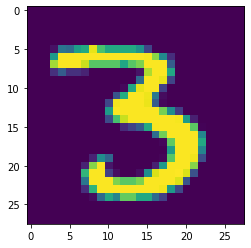

In [5]:
i = 12

plt.imshow(x_train[i])
print("Labeled number is {}".format(y_train[i]))

In [6]:
# Normalizing the Images
x_train = x_train/ 255.0
x_test = x_test/255.0

In [7]:
# Reshaping
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

In [8]:
y_train.shape

(60000,)

Define Callback as to stop iterating the Epochs once we reach 99% of accuracy

In [12]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if(logs.get("accuracy") > 0.99):
            print("\nReached 99% accuracy")
            self.model.stop_training = True

In [13]:
# Training the Model
callbacks = mycallback()
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = "relu", input_shape = (28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             # One more Convolution layer with Max pool layer
                             tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             # Flattening the output of Convolutional layer
                             tf.keras.layers.Flatten(),
                             # One dense layer and then preceeding with Softmax layer
                             tf.keras.layers.Dense(units = 100, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(x_train, y_train,validation_data = (x_test, y_test) ,epochs = 5, callbacks = [callbacks])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 366us/sample - loss: 0.1571 - accuracy: 0.9525 - val_loss: 0.0680 - val_accuracy: 0.9786
Epoch 2/5
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0382 - val_accuracy: 0.9879
Epoch 3/5
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0361 - val_accuracy: 0.9878
Epoch 4/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.0275 - accuracy: 0.9909
Reached 99% accuracy
60000/60000 [==============================] - 20s 341us/sample - loss: 0.0276 - accuracy: 0.9909 - val_loss: 0.0324 - val_accuracy: 0.9896


In [14]:
# Look at the summary of model to see each layer and its trainable parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               80100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [15]:
history = model.history

##### Training Vs. Validation Accuracy

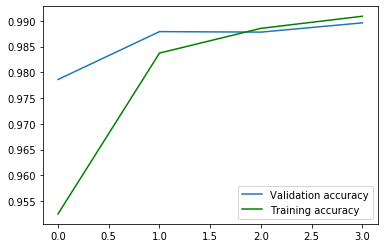

In [16]:
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.plot(history.history["accuracy"], label = "Training accuracy", color = "g")
plt.legend()

##### Training Vs. Validation Loss

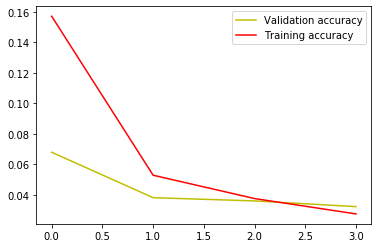

In [17]:
plt.plot(history.history["val_loss"], label = "Validation accuracy", color = "y")
plt.plot(history.history["loss"], label = "Training accuracy", color = "r")
plt.legend()
plt.show()

Predicted Number is 9


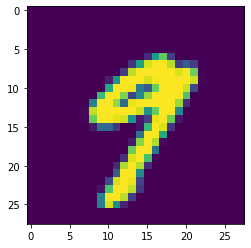

In [18]:
i  = 20

print("Predicted Number is {}".format(np.argmax(model.predict(x_test)[i])))
plt.imshow(x_test[i][:,:,-1])
plt.show()